# Downloading and Extracting Dataset

In [ ]:
!wget --no-check-certificate https://toil.xenahubs.net/download/tcga_RSEM_Hugo_norm_count.gz -O /var/tcga_RSEM_Hugo_norm_count.gz


--2020-10-30 08:49:35--  https://toil.xenahubs.net/download/tcga_RSEM_Hugo_norm_count.gz
Resolving toil.xenahubs.net (toil.xenahubs.net)... 3.87.181.184, 52.6.45.164
Connecting to toil.xenahubs.net (toil.xenahubs.net)|3.87.181.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935272500 (892M) [application/gzip]
Saving to: ‘/var/tcga_RSEM_Hugo_norm_count.gz’

/var/tcga_RSEM_Hugo 100%[===================>] 891.95M  23.4MB/s    in 29s     

2020-10-30 08:50:05 (30.4 MB/s) - ‘/var/tcga_RSEM_Hugo_norm_count.gz’ saved [935272500/935272500]



In [ ]:
#install patool for extracting .zip/.gz files
#!pip install patool

In [ ]:
#import patoolib
import os
os.chdir("..")
os.chdir("var")
#patoolib.extract_archive("tcga_RSEM_Hugo_norm_count.gz",outdir="Dataset")

# Visualizing Data and performing preprocessing on the dataset

In [ ]:
import os
import math
import numpy as np
from sklearn import linear_model, metrics
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#import tensorflow as tf
import random
#from tensorflow.python.framework import ops
%matplotlib inline
np.random.seed(500)

In [ ]:
#os.listdir()
#os.chdir("..")
%%time
data = pd.read_csv('tcga_RSEM_Hugo_norm_count.gz', compression='gzip', delim_whitespace = True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58581 entries, 0 to 58580
Columns: 10536 entries, sample to TCGA-FV-A3I0-11
dtypes: float64(10535), object(1)
memory usage: 4.6+ GB
None
CPU times: user 4min 47s, sys: 14 s, total: 5min 1s
Wall time: 5min 2s


In [ ]:
##load the data to pandas dataframe
#data = pd.read_table('tcga_RSEM_Hugo_norm_count')
#Analyzing mean standard deviation and other stuffs in our dataset
#data.describe()

In [ ]:
#checking top 5 rows of the dataset and see how the cols are filled in the dataset
data.head()

,sample,TCGA-S9-A7J2-01,TCGA-G3-A3CH-11,TCGA-EK-A2RE-01,TCGA-44-6778-01,TCGA-F4-6854-01,TCGA-AB-2863-03,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,TCGA-05-4420-01,TCGA-2G-AAFZ-01,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-CC-A3MA-01,TCGA-BR-A4J6-01,TCGA-KK-A6E4-01,TCGA-IN-7808-01,TCGA-L5-A4OH-01,TCGA-RP-A695-06,TCGA-A4-7828-01,TCGA-B9-A8YH-01,TCGA-E1-A7YI-01,TCGA-PC-A5DM-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,TCGA-A2-A3XX-01,TCGA-DQ-5624-01,TCGA-KK-A7B3-01,TCGA-DQ-7591-01,TCGA-06-5412-01,TCGA-BP-4989-01,TCGA-EJ-8468-01,TCGA-CZ-5459-01,TCGA-D5-5538-01,TCGA-KP-A3W3-01,TCGA-CZ-5468-11,TCGA-BH-A0BQ-11,TCGA-4X-A9FA-01,TCGA-DD-AAW0-01,TCGA-BR-4292-01,...,TCGA-13-0725-01,TCGA-95-7947-01,TCGA-A8-A090-01,TCGA-BB-4217-01,TCGA-5T-A9QA-01,TCGA-TN-A7HJ-01,TCGA-AN-A0XT-01,TCGA-TS-A8AS-01,TCGA-J4-8198-01,TCGA-OR-A5JS-01,TCGA-EE-A29L-06,TCGA-4X-A9F9-01,TCGA-C5-A1BJ-01,TCGA-G2-AA3C-01,TCGA-HU-8602-01,TCGA-CR-6470-01,TCGA-CH-5768-01,TCGA-2H-A9GM-01,TCGA-XH-A853-01,TCGA-CM-4751-01,TCGA-AO-A0J4-01,TCGA-55-6985-11,TCGA-2Y-A9H2-01,TCGA-BR-8368-01,TCGA-77-6844-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-18-3414-01,TCGA-13-1481-01,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-B6-A0IA-01,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,TCGA-24-2254-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
0,CTD-2588J6.1,0.7385,0.0000,0.0000,0.0000,0.0000,1.1763,0.0000,0.0000,0.9652,0.0000,0.0000,0.0000,0.000,1.1172,0.0000,3.0766,2.5313,0.0000,0.0000,0.0000,0.0000,0.0,1.5756,0.0000,0.0000,0.0000,0.0000,2.9498,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.9991,...,0.0000,0.0000,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.8332,0.0,0.0000,0.0000,0.0000,2.5645,0.0000,0.0000,0.9553,0.7411,0.0000,3.2706,0.0000,0.0000,0.0,1.1328,0.0000,0.6718,0.0000,0.0000,0.0000,0.0000,0.0,1.1745,0.0000,0.0000,0.0000,0.0000
1,RP11-433M22.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.6147,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.3212,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.5467,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,CTD-2588J6.2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
3,RP3-415N12.1,1.2246,0.0000,0.0000,0.0000,0.6597,6.2827,0.0000,0.0000,0.5619,0.0000,0.7678,0.0000,0.000,0.0000,0.0000,4.2614,2.7747,0.0000,0.0000,1.0863,0.6471,0.0,2.3106,0.9113,0.6641,0.0000,0.0000,0.0000,0.0000,1.9468,0.0000,0.0000,0.0000,0.0000,0.0000,1.157,0.7540,0.0000,0.5846,...,0.0000,0.6304,0.0000,0.0000,0.8506,0.0000,1.1992,0.0000,1.0832,0.0,0.0000,1.1257,0.4759,0.0,0.0000,0.0000,0.0000,2.1735,1.1639,0.0000,0.5553,1.2284,0.0000,2.1571,1.1570,1.3733,0.0,1.9936,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.5289,2.7234,0.0000,0.0000,0.0000
4,RP11-16E12.2,3.1734,4.2488,1.7038,6.7294,3.5869,5.0223,2.5437,6.7584,6.6983,3.2278,2.1743,4.6485,3.017,9.9893,3.1188,7.4127,2.6581,2.4978,2.0899,4.2880,3.9742,0.0,6.6537,4.2851,5.8507,5.0004,3.5782,5.8343,1.4283,3.9331,1.0663,2.8767,5.9821,3.9474,1.6825,3.354,1.6132,2.1896,6.2372,...,4.3152,4.9350,1.0986,7.3158,0.8506,4.5237,1.5579,2.0519,0.0000,0.0,1.8166,4.7551,3.2027,0.0,4.9299,6.2535,0.6731,4.8969,2.7188,5.1151,5.8764,4.9009,3.9896,6.1156,3.7986,2.0639,0.0,3.7576,3.6766,6.7196,2.6947,3.4837,4

In [ ]:
#checking if there are any missing values luckily we dont have any missig values :)
data.isnull().any().sum()

0




*   check what kind of datatypes are in dataset.
*   First we see the cols which are not numerical
*   only sample column is having non-numerial value 









In [ ]:
data_object=data.select_dtypes(include=['object']) 
data_object

,sample
0,CTD-2588J6.1
1,RP11-433M22.1
2,CTD-2588J6.2
3,RP3-415N12.1
4,RP11-16E12.2
...,...
58576,SELV
58577,NFIX
58578,SELP
58579,AC002386.1


In [ ]:
data_float = data.select_dtypes(include=['float64'])

In [ ]:
column_names = list(data_float.columns.values)
column_names[0],len(column_names)


('TCGA-S9-A7J2-01', 10535)

Cancer Labels: {1: 9186, 3: 173, 6: 392, 2: 44, 5: 11, 7: 1}
With cancer = 9807, Without Cancer = 728


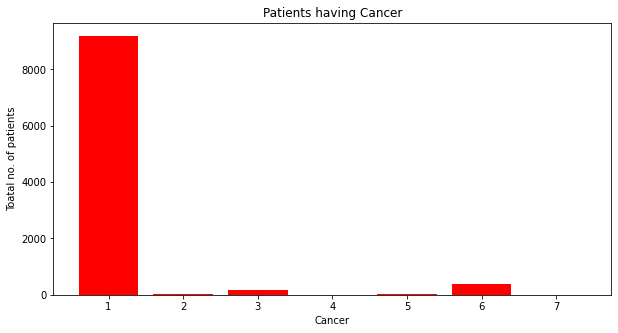

In [ ]:
label_x=[s[-2:] for s in column_names if s[-2:] not in ("10","11","20")]
label_x[0]
labels={}
for i in label_x:
  if int(i) in labels:
    labels[int(i)]+=1
  else:
    labels[int(i)]=1
print("Cancer Labels:" ,labels)
print("With cancer = {}, Without Cancer = {}".format(sum(labels.values()),len(column_names)-sum(labels.values())))
labels_temp=list(labels.keys())
values_temp=list(labels.values())
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot 
plt.bar(labels_temp, values_temp, color ='r',width = 0.8) 
  
plt.xlabel("Cancer") 
plt.ylabel("Toatal no. of patients") 
plt.title("Patients having Cancer") 
plt.show()

In [ ]:
label = [s[-2:] for s in column_names]
print(len(label))

10535


In [ ]:
label = [0 if s in ('01', '02', '03', '04', '05', '06', '07', '08', '09') else 1 for s in label]
print (label.count(0)) #cancer (9807)
print (label.count(1)) #non-cancer (728)

9807
728


**Plotting** **Labels**

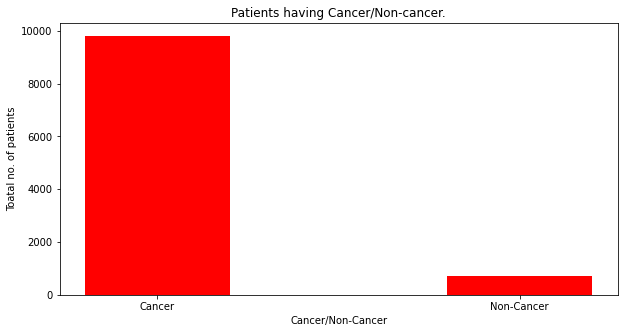

In [ ]:
data={"Cancer":label.count(0),
      "Non-Cancer":label.count(1)}
labels=list(data.keys())
values=list(data.values())
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot 
plt.bar(labels, values, color ='r',width = 0.4) 
  
plt.xlabel("Cancer/Non-Cancer") 
plt.ylabel("Toatal no. of patients") 
plt.title("Patients having Cancer/Non-cancer.") 
plt.show()

**splitting the data randomly into training and test set**

**Training set = 0.80, Testing set = 0.20**



In [ ]:
random.seed(500)
data_index = random.sample(range(0, len(label)), 8500)
X_train,Y_train = [data_float.iloc[:,j] for j in data_index],[label[j] for j in data_index]
X_test = [data_float.iloc[:,j] for j in range(0, len(label)) if j not in data_index]
Y_test = [label[j] for j in range(0, len(label)) if j not in data_index]

In [ ]:
data_float.head()

,TCGA-S9-A7J2-01,TCGA-G3-A3CH-11,TCGA-EK-A2RE-01,TCGA-44-6778-01,TCGA-F4-6854-01,TCGA-AB-2863-03,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,TCGA-05-4420-01,TCGA-2G-AAFZ-01,TCGA-DX-A3U8-01,TCGA-GL-8500-01,TCGA-CC-A3MA-01,TCGA-BR-A4J6-01,TCGA-KK-A6E4-01,TCGA-IN-7808-01,TCGA-L5-A4OH-01,TCGA-RP-A695-06,TCGA-A4-7828-01,TCGA-B9-A8YH-01,TCGA-E1-A7YI-01,TCGA-PC-A5DM-01,TCGA-BR-A4QL-01,TCGA-CH-5751-01,TCGA-A2-A3XX-01,TCGA-DQ-5624-01,TCGA-KK-A7B3-01,TCGA-DQ-7591-01,TCGA-06-5412-01,TCGA-BP-4989-01,TCGA-EJ-8468-01,TCGA-CZ-5459-01,TCGA-D5-5538-01,TCGA-KP-A3W3-01,TCGA-CZ-5468-11,TCGA-BH-A0BQ-11,TCGA-4X-A9FA-01,TCGA-DD-AAW0-01,TCGA-BR-4292-01,TCGA-AA-3511-01,...,TCGA-13-0725-01,TCGA-95-7947-01,TCGA-A8-A090-01,TCGA-BB-4217-01,TCGA-5T-A9QA-01,TCGA-TN-A7HJ-01,TCGA-AN-A0XT-01,TCGA-TS-A8AS-01,TCGA-J4-8198-01,TCGA-OR-A5JS-01,TCGA-EE-A29L-06,TCGA-4X-A9F9-01,TCGA-C5-A1BJ-01,TCGA-G2-AA3C-01,TCGA-HU-8602-01,TCGA-CR-6470-01,TCGA-CH-5768-01,TCGA-2H-A9GM-01,TCGA-XH-A853-01,TCGA-CM-4751-01,TCGA-AO-A0J4-01,TCGA-55-6985-11,TCGA-2Y-A9H2-01,TCGA-BR-8368-01,TCGA-77-6844-01,TCGA-IN-AB1X-11,TCGA-CS-4944-01,TCGA-A2-A0YK-01,TCGA-18-3414-01,TCGA-13-1481-01,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-B6-A0IA-01,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,TCGA-24-2254-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
0,0.7385,0.0000,0.0000,0.0000,0.0000,1.1763,0.0000,0.0000,0.9652,0.0000,0.0000,0.0000,0.000,1.1172,0.0000,3.0766,2.5313,0.0000,0.0000,0.0000,0.0000,0.0,1.5756,0.0000,0.0000,0.0000,0.0000,2.9498,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.9991,0.0000,...,0.0000,0.0000,0.0000,1.8900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.8332,0.0,0.0000,0.0000,0.0000,2.5645,0.0000,0.0000,0.9553,0.7411,0.0000,3.2706,0.0000,0.0000,0.0,1.1328,0.0000,0.6718,0.0000,0.0000,0.0000,0.0000,0.0,1.1745,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.6147,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.3212,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.5467,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
3,1.2246,0.0000,0.0000,0.0000,0.6597,6.2827,0.0000,0.0000,0.5619,0.0000,0.7678,0.0000,0.000,0.0000,0.0000,4.2614,2.7747,0.0000,0.0000,1.0863,0.6471,0.0,2.3106,0.9113,0.6641,0.0000,0.0000,0.0000,0.0000,1.9468,0.0000,0.0000,0.0000,0.0000,0.0000,1.157,0.7540,0.0000,0.5846,0.7793,...,0.0000,0.6304,0.0000,0.0000,0.8506,0.0000,1.1992,0.0000,1.0832,0.0,0.0000,1.1257,0.4759,0.0,0.0000,0.0000,0.0000,2.1735,1.1639,0.0000,0.5553,1.2284,0.0000,2.1571,1.1570,1.3733,0.0,1.9936,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.5289,2.7234,0.0000,0.0000,0.0000
4,3.1734,4.2488,1.7038,6.7294,3.5869,5.0223,2.5437,6.7584,6.6983,3.2278,2.1743,4.6485,3.017,9.9893,3.1188,7.4127,2.6581,2.4978,2.0899,4.2880,3.9742,0.0,6.6537,4.2851,5.8507,5.0004,3.5782,5.8343,1.4283,3.9331,1.0663,2.8767,5.9821,3.9474,1.6825,3.354,1.6132,2.1896,6.2372,6.0008,...,4.3152,4.9350,1.0986,7.3158,0.8506,4.5237,1.5579,2.0519,0.0000,0.0,1.8166,4.7551,3.2027,0.0,4.9299,6.2535,0.6731,4.8969,2.7188,5.1151,5.8764,4.9009,3.9896,6.1156,3.7986,2.0639,0.0,3.7576,3.6766,6.7196,2.6947,3.4837,4.4897,6.6406,0.0,7.154

In [ ]:
print(Y_train.count(0))#7909
print(Y_train.count(1))#591

7909
591


In [ ]:
'''random.seed(500)
data_index = random.sample(range(0, len(label)), 8500)
X_train,Y_train = [data_float.iloc[:,j] for j in data_index],[label[j] for j in data_index]
X_test = [data_float.iloc[:,j] for j in range(0, len(label)) if j not in data_index]
Y_test = [label[j] for j in range(0, len(label)) if j not in data_index]'''

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    #Xx,Yy = [data.iloc[:,j] for j in data_index],[labels[j] for j in data_index]
    idx=list(range(0,len(data)))
    random.shuffle(idx)
    Xx=[data[ i] for i in idx]
    Yy=[labels[ i] for i in idx]
    
    return Xx,Yy


print(X_train[0])
print(Y_train[0])
bat=3
#Xtr, Ytr = next_batch(bat, X_train, Y_train)
print('\n{} random samples'.format(bat))
#print(Xtr)
#print(Ytr)

0         0.0000
1         0.0000
2         0.0000
3         0.9789
4         3.1321
          ...   
58576     0.0000
58577    11.2118
58578     7.0130
58579     0.0000
58580     0.0000
Name: TCGA-B0-4828-01, Length: 58581, dtype: float64
0

3 random samples


In [ ]:
len(X_train)

8500

Checking for Duplicates.

**Note:The X_train stores the hash values in the of form Series (which is 1-D labelled array). Series in pandas have a "name" attriute which can be accessed like so: 

In [ ]:
duplicates=[]
for i in range(len(X_train)):
  duplicates.append(X_train[i].name)
len(duplicates)

8500

No duplicates are present in the dataset. 

In [ ]:
dup=list(set(duplicates))
len(dup)

8500

In [ ]:
import math
import numpy as np
from sklearn import linear_model, metrics, ensemble
import pandas as pd
import h5py
#import tensorflow as tf
import random
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn import svm, datasets
#from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

In [ ]:
Y_train[0]

0

In [ ]:

'''random_forest_reg = ensemble.RandomForestRegressor()
random_forest_reg.fit(X_train, Y_train)
##plot the ROC curve for the training set and compute the auc_score
training_set_z_rf = random_forest_reg.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_test, training_set_z_rf)
training_auc_score_rf = metrics.roc_auc_score(Y_test, training_set_z_rf)
plt.plot(fpr_rf, tpr_rf)
plt.title("random_forest_test_roc")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()
print("Random Forest Training AUC: " + str(training_auc_score_rf))
'''

'random_forest_reg = ensemble.RandomForestRegressor()\nrandom_forest_reg.fit(X_train, Y_train)\n##plot the ROC curve for the training set and compute the auc_score\ntraining_set_z_rf = random_forest_reg.predict(X_test)\nfpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_test, training_set_z_rf)\ntraining_auc_score_rf = metrics.roc_auc_score(Y_test, training_set_z_rf)\nplt.plot(fpr_rf, tpr_rf)\nplt.title("random_forest_test_roc")\nplt.xlabel("false positive rate")\nplt.ylabel("true positive rate")\nplt.show()\nprint("Random Forest Training AUC: " + str(training_auc_score_rf))\n'

# New Section


To use tensor_forest we have to use tensorflow 1.x for that.

In [ ]:

### Model 1: Random forest
%tensorflow_version 1.x
from __future__ import print_function
import tensorflow as tf
from tensorflow.contrib.learn.python.learn import metric_spec
from tensorflow.contrib.learn.python.learn.estimators import estimator
from tensorflow.contrib.tensor_forest.client import eval_metrics
from tensorflow.contrib.tensor_forest.client import random_forest
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
tf.reset_default_graph()
# Parameters
num_steps = 100 # Total steps to train
batch_size = 100 # The number of samples per batch
num_classes = 2 
num_features = 58581 
num_trees = 10
max_nodes = 30

# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
Y = tf.placeholder(tf.int32, shape=[None])

# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes).fill()

# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)

# Get training graph and loss
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))

# Start TensorFlow session
sess = tf.Session()

# Run the initializer
sess.run(init_vars)
# Training
for i in range(1, num_steps + 1):
    # Prepare Data
    X_train,Y_train = next_batch(batch_size,X_train,Y_train)
    _, l = sess.run([train_op, loss_op], feed_dict={X: X_train, Y: Y_train})
    if i % 50 == 0 or i == 1:
        acc = sess.run(accuracy_op, feed_dict={X: X_train, Y: Y_train})
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

# Test Model
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: X_test, Y: Y_test}))

TensorFlow 1.x selected.
INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 10, 'max_nodes': 30, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 242, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 58581, 'bagged_num_features': 58581, 'bagged_features': None, 'regression': False, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}
Instr